# This notebook we're going to see:
<ul>
    <li>Using and adding functions to risk kit</li>
    <li>Using a Minimizer to set weights</li>
</ul>  

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as web
import datetime
import risk_kit as erk
import seaborn as sns
%matplotlib inline

In [2]:
# auto reload imported modules
%load_ext autoreload
%autoreload 2

# Importing data

In [5]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind['1996':'2000'], 12)
cov = ind['1996':'2000'].cov()

In [12]:
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002609,0.002379,0.002061,0.000846,0.001035,0.001374,0.001733,0.001230,0.001414,0.001216,...,0.000667,0.000237,-0.000315,0.001429,0.001534,0.000740,0.001363,0.001230,0.002132,0.001057
Beer,0.002379,0.005264,0.001359,0.001348,0.000865,0.002804,0.001704,0.001955,0.001460,0.002005,...,0.001146,0.000438,0.000007,0.001710,0.002284,0.000697,0.001690,0.001822,0.002571,0.001383
Smoke,0.002061,0.001359,0.008349,0.000379,-0.000128,0.001167,0.000950,0.001038,0.000853,0.000779,...,0.000062,-0.000218,-0.000120,0.001327,0.000396,0.001707,0.000105,0.000703,0.001312,0.001741
Games,0.000846,0.001348,0.000379,0.003773,0.001726,0.001206,0.002189,0.001433,0.001775,0.001422,...,0.001922,0.002848,0.003434,0.001852,0.001578,0.001966,0.001872,0.001561,0.002416,0.002382
Books,0.001035,0.000865,-0.000128,0.001726,0.002612,0.001025,0.002361,0.000758,0.001731,0.001459,...,0.001918,0.002367,0.001944,0.001638,0.001776,0.001392,0.002223,0.001189,0.002261,0.001442
Hshld,0.001374,0.002804,0.001167,0.001206,0.001025,0.003300,0.001320,0.001473,0.001413,0.001364,...,0.001060,0.001310,0.001102,0.001873,0.001582,0.000683,0.001378,0.001202,0.001912,0.001580
Clths,0.001733,0.001704,0.000950,0.002189,0.002361,0.001320,0.005655,0.000834,0.002932,0.002472,...,0.001436,0.001625,0.000834,0.003165,0.002862,0.001934,0.003013,0.002721,0.003210,0.002299
Hlth,0.001230,0.001955,0.001038,0.001433,0.000758,0.001473,0.000834,0.002565,0.000474,0.000608,...,0.001204,0.001651,0.001535,0.000650,0.000944,0.001056,0.000869,0.000986,0.001617,0.001258
Chems,0.001414,0.001460,0.000853,0.001775,0.001731,0.001413,0.002932,0.000474,0.003276,0.001868,...,0.001004,0.001203,0.001031,0.002920,0.002196,0.001404,0.001808,0.001646,0.002469,0.002059
Txtls,0.001216,0.002005,0.000779,0.001422,0.001459,0.001364,0.002472,0.000608,0.001868,0.003117,...,0.000907,0.000666,0.000702,0.002058,0.001929,0.001610,0.001805,0.001250,0.001986,0.001811


### function to plot 2 asset portifolio

```python
def plot_ef2(n_points, er, cov, style="-"):
    """
    plot 2 asset efficient frontier
    """
    if er.shape[0] != 2 or er.shape[0] != 2:
        raise ValueError("plot_ef2 can only plot 2- asset frontiers")
    weights = [np.array([w,1-w]) for w in np.linspace(0,1, n_points)]
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef= pd.DataFrame({'Returns':rets, 'Vol': vols})
    return ef.plot.line(x='Vol',y='Returns',  style = '.-', figsize=(12,8))
```


minimize_vol(target_return)

In [15]:
def plot_ef2(n_points, er, cov, style="-"):
    """
    plot 2 asset efficient frontier
    """
    if er.shape[0] != 2 or er.shape[0] != 2:
        raise ValueError("plot_ef2 can only plot 2- asset frontiers")
        
    weights = [np.array([w,1-w]) for w in np.linspace(0,1, n_points)]
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef= pd.DataFrame({'Returns':rets, 'Vol': vols})
    return ef.plot.line(x='Vol',y='Returns',  style = '.-', figsize=(12,8))

In [16]:
from scipy.optimize import minimize 

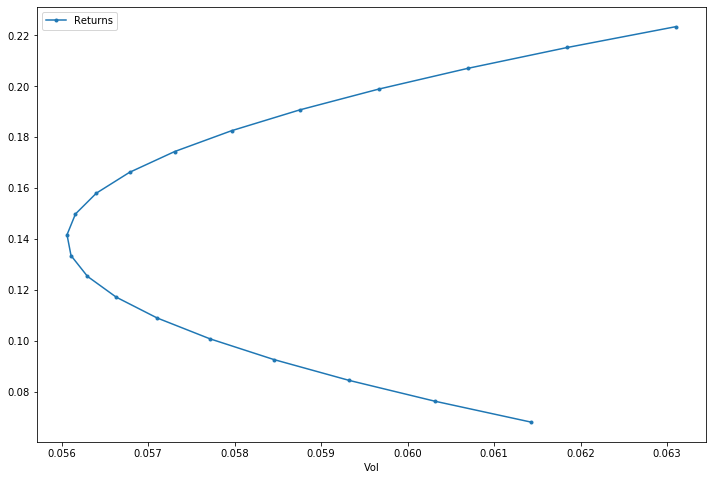

In [41]:
l = ['Games','Fin']
erk.plot_ef2(20,er[l], cov.loc[l,l])

this function will return a weight vector for the minimun volatility given a espected return

In [35]:
def minimize_vol(target_r, er, cov):
    """
    target return -> weight vector
    """
    
    n = er.shape[0]
    
    #init guess
    init_guess = np.repeat(1/n, n)
    
    #bounds minimum of 0 maximun of 1, for n assets
    bounds = ((0.0,1),)*n
    #constrain to stop the function when met the espected return
    return_is_target = {
        'type':'eq',
        'args': (er,),
        'fun': lambda weights, er: target_r - erk.portfolio_return(weights,er) #function to test if its the er is equal to er searched
    }
    #constrain to set the sum of weights to 1
    weights_sum_to_1= {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights)-1        
    }
    
    results = minimize(erk.portfolio_vol, init_guess ,args=(cov,),
                       method='SLSQP',
                       options={'disp': False},
                       constraints =(return_is_target, weights_sum_to_1),
                       bounds = bounds
                      )
    return results.x

In [40]:
w15 = minimize_vol(0.15, er[l], cov.loc[l,l])
w15

array([0.47287631, 0.52712369])

In [39]:
vol15 = erk.portfolio_vol(w15,cov.loc[l,l])
vol15

0.056163669406706564

In [43]:
w15 = erk.minimize_vol(0.15, er[l], cov.loc[l,l])


In [45]:
w15

array([0.47287631, 0.52712369])

In [47]:
vol15 = erk.portfolio_vol(w15,cov.loc[l,l])

### plotting efficient frontier 

In [49]:
def optimal_weights(n_points, er, cov):
    """
    -> list of weights to run the optimizer on to minimize the vol
    """
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    
    return weights
    
    

In [53]:
def optimal_weights(n_points, er, cov):
    """
    -> list of weights to run the optimizer on to minimize the vol
    """
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    
    return weights

def plot_ef2(n_points, er, cov, style="-"):
    """
    plot 2 asset efficient frontier
    """

    weights = optimal_weights(n_points,er,cov)
    rets = [erk.portfolio_return(w, er) for w in weights]
    vols = [erk.portfolio_vol(w, cov) for w in weights]
    ef= pd.DataFrame({'Returns':rets, 'Vol': vols})
    return ef.plot.line(x='Vol',y='Returns',  style = '.-', figsize=(12,8))

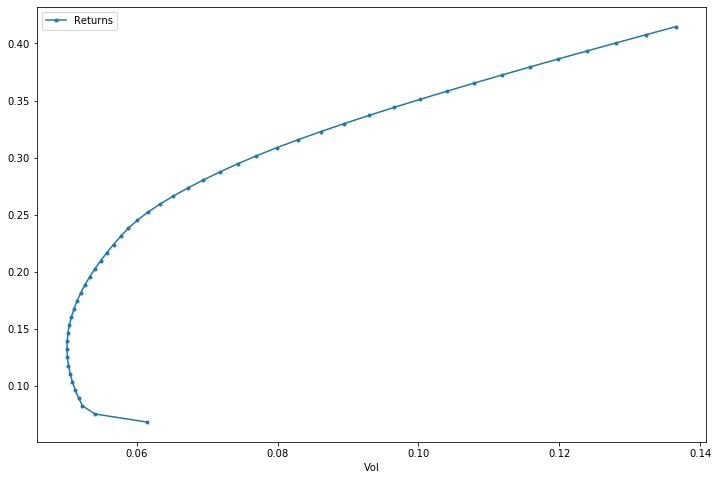

In [55]:
l = ['Smoke','Fin','Games','Coal']
plot_ef2(50,er[l],cov.loc[l,l])